# Parental Involvement & Student Outcomes


Anil Onal and Steven Dye

Module 3 Project: Hypothesis Testing

## The Problem Statement

We attempted to find a relationship between a child's success at school and the amount of time that their parents are involved with them. We then sought to break down the different types of parental involvement in order to see if they have differential effects on a child's success at school. More specifically, we aimed to answer the following:
#### 1. Is increased parental involvement correlated with stronger student performance?
#### 2. Does the type of parental involvement matter?


## Data

Our data is the National Household Education Survey Program of 2016 from the National Center for Education Statistics. This data was collected in the NHES's Parent and Family Involvement in Education (PFI) Survey. The survey collects data on children from grades kindergarten to 12th grade and asks various questions about the child's performance in school and the involvement of the parents. The survey is filled out by the parents. The data is compiled in a csv file with 822 columns and 14075 entries. The data is nationally representative and uses a two-stage addressed-based sampling. 

The data was then cleaned by removing the irrelevant columns, dropping homeschooled children and those who do not have grades, dropping observations with missing values for the variables of interest, and constructing two composite indicators for at-home and at-school parental involvement.

In [7]:
%run 'data_prep.py'
import pandas as pd
pi_df = pd.read_csv('data/df_pi.csv')

In [8]:
pi_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11344.0,5671.500000,3274.875061,0.000000,2835.750000,5671.500000,8507.250000,11343.000000
Unnamed: 0.1,11344.0,7060.737482,4059.249030,0.000000,3545.750000,7101.500000,10560.250000,14073.000000
SEENJOY,11344.0,1.764193,0.696853,1.000000,1.000000,2.000000,2.000000,4.000000
SEGRADES,11344.0,1.633639,0.771038,1.000000,1.000000,1.000000,2.000000,4.000000
SEABSNT,11344.0,4.128791,6.670088,0.000000,1.000000,3.000000,5.000000,364.000000
SEREPEAT,11344.0,1.923836,0.265271,1.000000,2.000000,2.000000,2.000000,2.000000
SESUSPIN,11344.0,1.932740,0.250483,1.000000,2.000000,2.000000,2.000000,2.000000
FSSPORTX,11344.0,1.802803,0.397900,1.000000,2.000000,2.000000,2.000000,2.000000
FSVOL,11344.0,1.410085,0.491870,1.000000,1.000000,1.000000,2.000000,2.000000
FSMTNG,11344.0,1.860631,0.346346,1.000000,2.000000,2.000000,2.000000,2.000000


## Data visualization

The following charts show the distributions for the features of interest and try to explore if any correlation is visible to eye between the parental involvement features and student performance at school. 
The charts are produced using Seaborn and statsmodels mosaic method, which is the graphical representation of a contingency table.

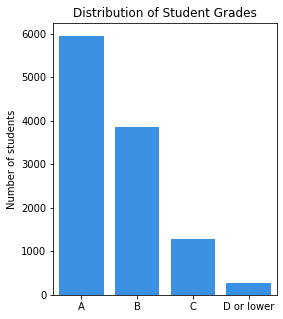

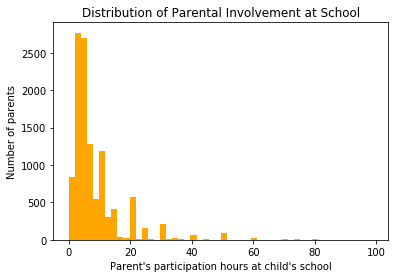

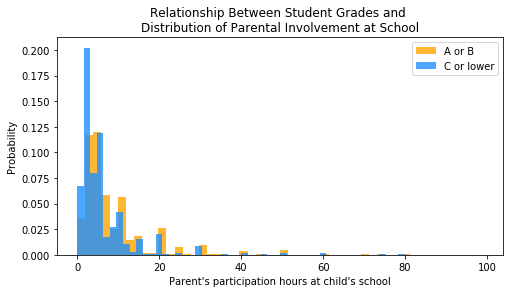

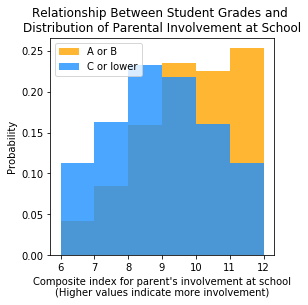

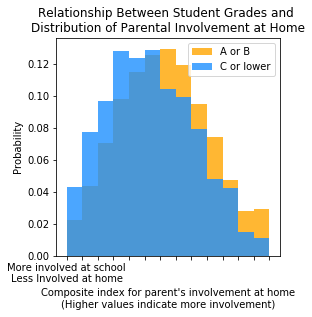

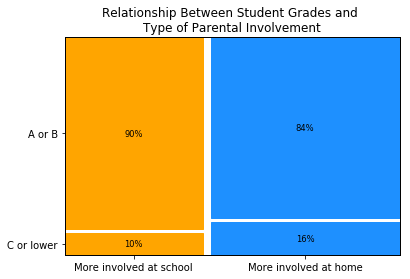

In [5]:
%matplotlib inline
%run 'visualizations.py'

## Methodology

When examining children's performance at school, we focused on question 13 from the survey: **"Please tell us about this child's grades during this school year. Overall, across all subjects, what grades does this child get?"** We used responses, 1 (A), 2 (B), 3 (C), and 4 (D or lower). We separated the students into two groups based on performance: a high performing, 'A or B' group, and a lower performing, 'C or lower' group. 
In the first stage of analysis, to proxy parental involvement, we used question 31 from the survey: **"During this school year, how many times has any adult in the household gone to meetings or participated in activities at this child’s school?"** The response was coded as FSFREQ in the data. We tested the null hypothesis that if the distributions of **FSFREQ** came from the same population for both 'A or B' and 'C or lower' students.
To generalize our findings, we constructed and used two more parental involvement indicators. The first indicator **pi_pro_schl_feats_comp** captured different aspects of parental involvement at school and had a binomial distribution. The second, **pi_pro_hm_feats_comp** captured the aspects of parental involvement at home and had similarly a binominal distribution, making it comparable with pi_pro_schl_feats_comp.
In the second stage of our analysis, we tested the null hypothesis that the distribution of each of our constructed composite indicators were the same regardless of the student performance. Finally, we tested the null hypothesis that distribution of student performance was the same regardless of the type of parental involvement.   

Text(0, 0.5, 'Number of parents/students')

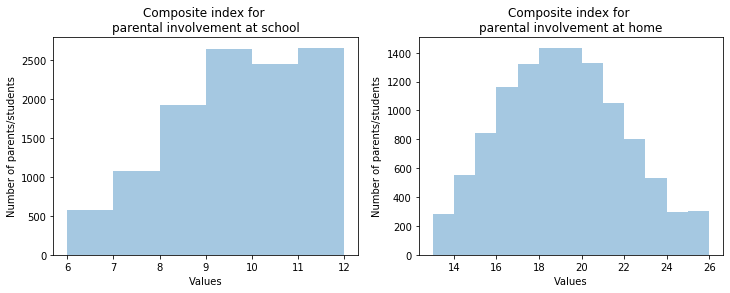

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
sns.distplot(pi_df.pi_pro_schl_feats_comp, bins = 6, kde = False, ax = ax1)
ax1.set_title('Composite index for \nparental involvement at school')
ax1.set_xlabel('Values')
ax1.set_ylabel('Number of parents/students')
sns.distplot(pi_df.pi_pro_hm_feats_comp, bins = 13, kde = False, ax = ax2)
ax2.set_title('Composite index for \nparental involvement at home')
ax2.set_xlabel('Values')
ax2.set_ylabel('Number of parents/students')

## Findings

For high performing, 'A or B' students, the mean parental involvement hours (at-school) per year was 8.27 with a standard deviation of 9.34. For lower performing students, 'C or lower' group, the mean was 6.13 hours with a standard deviation of 7.43. 

In [2]:
import pandas as pd
df_pi = pd.read_csv('data/df_pi.csv') 
df_pi[['grades_comp', 'FSFREQ']].groupby('grades_comp').describe()

FSFREQ                                               
              count      mean       std  min  25%  50%   75%   max
grades_comp                                                       
A or B       9811.0  8.275813  9.335887  0.0  3.0  5.0  10.0  99.0
C or lower   1533.0  6.134377  7.428173  0.0  2.0  4.0   7.0  80.0

Since the data is ratio and consists of two independent samples from a non-normal distribution, a Mann-Whitney U test was used to measure significance. This gives a t score of 6101030.5, resulting in a p-value of 3.04533694645921e-33. The Cohen's d value was found to be 0.24, making the size moderately important. With an alpha value of 0.05, the power was calculated to be 1.0. The following run of 'hypothesis_test.py' includes the Mann-Whitney U test results along with the other tests. The following cell calculates Cohen's d.

In [3]:
%run 'hypothesis_test.py'

MannwhitneyuResult(statistic=6101030.5, pvalue=3.04533694645921e-33)
df          6
pvalue      0.0
statistic   396.99475325065384
pi_pro_schl_feats_comp          6          7          8         9          10  \
grades_comp                                                                     
A or B                   17.930075  11.369403   5.616625  0.245542   3.365038   
C or lower              114.750141  72.762696  35.945665  1.571437  21.535804   

pi_pro_schl_feats_comp         11         12  
grades_comp                                   
A or B                   9.143711   5.978492  
C or lower              58.518558  38.261566  
df          13
pvalue      0.0
statistic   133.27158289764128
pi_pro_hm_feats_comp         13         14         15         16        17  \
grades_comp                                                                  
A or B                 3.147624   4.195725   1.717987   1.589716  0.121102   
C or lower            20.144383  26.852094  10.994890  10.173

5.2592893991195006e-18 False
('FOCRAFTS', 'FOSPRTEVX') FOSPRTEVX          1          2
FOCRAFTS                       
1          11.689938  16.322453
2          19.519913  27.255308
2.7298401666518966e-107 False
('FOGAMES', 'FOBUILDX') FOBUILDX           1           2
FOGAMES                         
1         124.018670   98.551776
2         145.754636  115.824322
2.596560993684259e-170 False
('FOGAMES', 'FOSPORT') FOSPORT           1           2
FOGAMES                        
1        255.863931   99.924306
2        300.707581  117.437405
5.664913917469213e-25 False
('FOGAMES', 'FOHISTX') FOHISTX          1          2
FOGAMES                      
1        27.098993  21.875195
2        31.848462  25.709121
1.6652765150426635e-80 False
('FOGAMES', 'FOLIBRAYX') FOLIBRAYX          1           2
FOGAMES                         
1          52.516770  113.476610
2          61.721052  133.364936
1.3500932505062583e-70 False
('FOGAMES', 'FOBOOKSTX') FOBOOKSTX          1           2
FOGAMES

2.7220249600343348e-70 False
('FOCONCRTX', 'FOSPRTEVX') FOSPRTEVX          1           2
FOCONCRTX                       
1          47.721927   66.633277
2          83.389126  116.434753
2.226245000460135e-168 False
('FOMUSEUMX', 'FOZOOX') FOZOOX              1           2
FOMUSEUMX                        
1           36.542481  157.348028
2          107.644617  463.506242
7.645313685121614e-42 False
('FOMUSEUMX', 'FOGROUPX') FOGROUPX           1          2
FOMUSEUMX                      
1          25.164731  21.389200
2          74.128732  63.007005
2.632744592954504e-23 False
('FOMUSEUMX', 'FOSPRTEVX') FOSPRTEVX          1          2
FOMUSEUMX                      
1          10.462706  14.608891
2          30.820404  43.033982
5.087086840820927e-12 False
('FOZOOX', 'FOGROUPX') FOGROUPX          1          2
FOZOOX                        
1          4.855200   4.126762
2         20.905975  17.769397
1.4449320645866474e-22 False
('FOZOOX', 'FOSPRTEVX') FOSPRTEVX          1          

NameError: name 'valid_grades_df' is not defined

In [7]:
import numpy as np
mean_1 = df_pi.loc[df_pi.grades_comp == 'A or B'].FSFREQ.mean()
mean_2 = df_pi.loc[df_pi.grades_comp == 'C or lower'].FSFREQ.mean()
n_1 = len(df_pi.loc[df_pi.grades_comp == 'A or B'].FSFREQ)
n_2 = len(df_pi.loc[df_pi.grades_comp == 'C or lower'].FSFREQ)
var1 = np.var(df_pi.loc[df_pi.grades_comp == 'A or B'].FSFREQ, ddof=1)
var2 = np.var(df_pi.loc[df_pi.grades_comp == 'C or lower'].FSFREQ, ddof=1)

num = (n_1-1)*var1 + (n_2-1)*var2
denom = (n_1+n_2-2)
s_W = np.sqrt(num/denom)

d = np.abs(mean_1 - mean_2)/s_W

print(round(d, 2))

0.24


If we assume that the number of hours parents spend at school are distributed normally across the **population** (not the sample), we can then also run a t-test and calculate the power of our prediction using the p-value, size of the effect, and degrees of freedom, which we find to be 1. 

In [10]:
from statsmodels.stats.power import TTestIndPower
import scipy.stats as stats
sample1 = df_pi.loc[df_pi.grades_comp == 'A or B'].FSFREQ
sample2 = df_pi.loc[df_pi.grades_comp == 'C or lower'].FSFREQ
results = stats.ttest_ind(sample1, sample2)
print(results)
power_analysis = TTestIndPower()
print(power_analysis.solve_power(effect_size = d, nobs1 = n_1, ratio = n_2/n_1, alpha = 0.05))

Ttest_indResult(statistic=8.567068497222728, pvalue=1.1985824614705248e-17)
1.0


In the second stage of analysis, we conduct a similar analysis for our two constructed composite parental involvement indicators. We use a chi-2 test as the both of these indicators have binomial distributions. The null hypothesis is that the distribution of parental involvement does not depend on student grades i.e. whether the students are in the 'A or B' or 'C or lower' groups. For the at-school involvement indicator, **pi_pro_schl_feats_comp**, we get a chi-2 statistic of 396.99475325065384. This gives us a p-value of 0. For the at-home involvement indicator, **pi_pro_hm_feats_comp**, the chi-2 statistic is 133.27158289764128. Similarly, this gives a p-value of 0. We can reject the null hypothesis. The results are seen in the cell above that shows the output from hypothesis_test.py file.  

Lastly, we test whether the type of involvement matters i.e. whether the student is in 'A or B' group or 'C or lower' group depends on whether the parental are more involved at-school or at-home. For this analysis, we construct two groups of involvement: high and low. The cutoff between the two groups is the mean for each type of involvement. This gives us the following contingency table.  

In [18]:
import statsmodels.api as sm
contingency_table = sm.stats.Table.from_data(df_pi[['schl_comp', 'hm_comp']])
print(df_pi.groupby('schl_comp').schl_comp.count())
print()
print(df_pi.groupby('hm_comp').hm_comp.count())
print('\nRows are High at-school involvement and Low at-school involvement\nColumns are High at-home involvement and Low at-home involvement\n')
print(contingency_table)

schl_comp
High    5112
Low     6232
Name: schl_comp, dtype: int64

hm_comp
High    5758
Low     5586
Name: hm_comp, dtype: int64

Rows are High at-school involvement and Low at-school involvement
Columns are High at-home involvement and Low at-home involvement

A 2x2 contingency table with counts:
[[3359. 1753.]
 [2399. 3833.]]


What we use in our analysis are off-diagonal cells. One group contains parents who were more involved at-school and less-involved at home. The other contains parents who were more involved at-home and less-involved at school. We then test the null hypothesis that whether a student is in group 'A or B' or 'C or lower' does not depend on his/her parents being in which of these groups. A chi-2 test gives us a statistic of 25.028514962081132 and a p-value of 5.648869436658543e-07. We can reject the null hypothesis. The results are seen in the cell above that shows the output from hypothesis_test.py file.     

## Conclusions

All in all, we find the following:

**1. There is a correlation between parental involvement and student grades**

**2. The type of parental involvement matters: At-school involvement appears to be better correlated with higher grades**

## Future Work

The directions for follow-up work can be summarized under the following headings:

**1. Fine-tune the composite parental involvement indicators**

**2. Design a predictive model**

**3. Translate findings to inferences about the entire population**


Starting with the third point, even though the survey is designed to be representative of the entire student population, it intentionally oversamples some groups of students. Therefore, to make inferences about the entire population, statistics derived from the sample need to be adjusted with the given weights. As this is a survey with a complex sampling design, the adjustment mechanism is also not simply. It requires 80 + 1 weights, which are provided along with the survey data and possibly a specialized software depending on the type of adjustment. 

To test the robustness of our findings regarding the type of parental involvement and its relationship with student grades, a regression analysis would be useful to estimate the individual effects. 

To construct the composite indicators, we summed over 19 binary variables. Some of these variables are correlated with each other. Examing the implications of these correlations would be a useful avenue for future research for the robustness of our analysis.  